In [71]:
using Plots, Measures, JLD2

import VeryDiffPolyExperiments: map_logfile2network

# MNIST

In [12]:
function get_logfiles(path; file_filter="")
    logfiles_generated = readdir(path, join=true)
    logfiles_generated = filter(x -> contains(x, file_filter), logfiles_generated)
end


function logfile2netname(logfile)
    basename(map_logfile2network.(logfile))
end

logfile2netname (generic function with 1 method)

In [ ]:
function get_major_log_tick_labels(ticks)
    [isapprox(x, 10.0^round(log10(x))) ? "$x" : "" for x in ticks] 
end

get_major_log_tick_labels (generic function with 1 method)

In [18]:
logfiles_mnist = get_logfiles("../results/mnist", file_filter="2025-04-08")
netnames = logfile2netname.(logfiles_mnist)

results_mnist = Dict(netnames .=> load.(logfiles_generated))

Dict{String, Dict{String, Any}} with 6 entries:
  "mnist_256x6_1e4.onnx" => Dict("accs"=>Any[0.121867, 0.112367, 0.112367, 0.13…
  "mnist-net_256x4.onnx" => Dict("accs"=>Any[0.107817, 0.09915, 0.09915, 0.0991…
  "mnist-net_256x6.onnx" => Dict("accs"=>Any[0.161417, 0.0986333, 0.0986333, 0.…
  "mnist_256x4_2e5.onnx" => Dict("accs"=>Any[0.163267, 0.18975, 0.15785, 0.2891…
  "mnist_256x4_1e4.onnx" => Dict("accs"=>Any[0.171583, 0.151333, 0.392833, 0.45…
  "mnist_256x6_2e5.onnx" => Dict("accs"=>Any[0.161817, 0.104933, 0.106583, 0.19…

In [ ]:
results_mnist["mnist_256x6_1e4.onnx"]

Dict{String, Any} with 7 entries:
  "accs"     => Any[0.121867, 0.112367, 0.112367, 0.132, 0.132183, 0.254933, 0.…
  "nets"     => Any[Network(Layer[Dense{Float32, Adjoint{Float32, ReshapedArray…
  "degrees"  => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  110, 120, 130, 140, 150, 160…
  "mses"     => Any[1036.61, 2527.86, 1061.92, 569.56, 406.051, 354.743, 327.81…
  "max_errs" => Any[42.0273, 59.0096, 40.4513, 33.2785, 30.2241, 28.0683, 26.58…
  "times"    => Any[27.9639, 28.2116, 28.5393, 28.9476, 29.1214, 29.4528, 29.70…
  "maes"     => Any[19.6023, 34.3102, 20.9138, 15.8286, 13.5651, 12.7859, 12.32…

## Accuracy

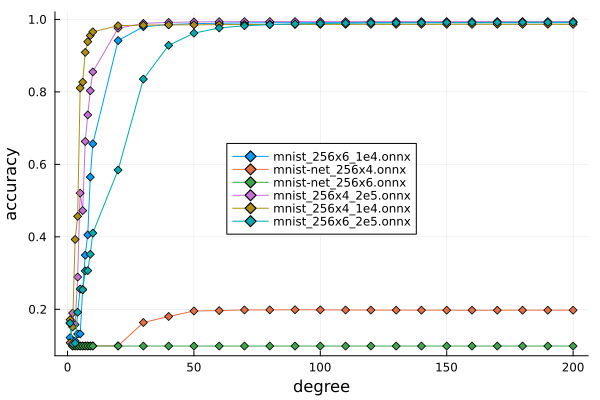

In [58]:
p = plot(xlabel="degree", ylabel="accuracy", legend=:inside)
for k in keys(results_mnist)
    degs = results_mnist[k]["degrees"]
    accs = results_mnist[k]["accs"]
    plot!(degs, accs, label=k, marker=:diamond)
end

p

In [59]:
savefig(p, "fig/accuracy_mnist.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/accuracy_mnist.pdf"

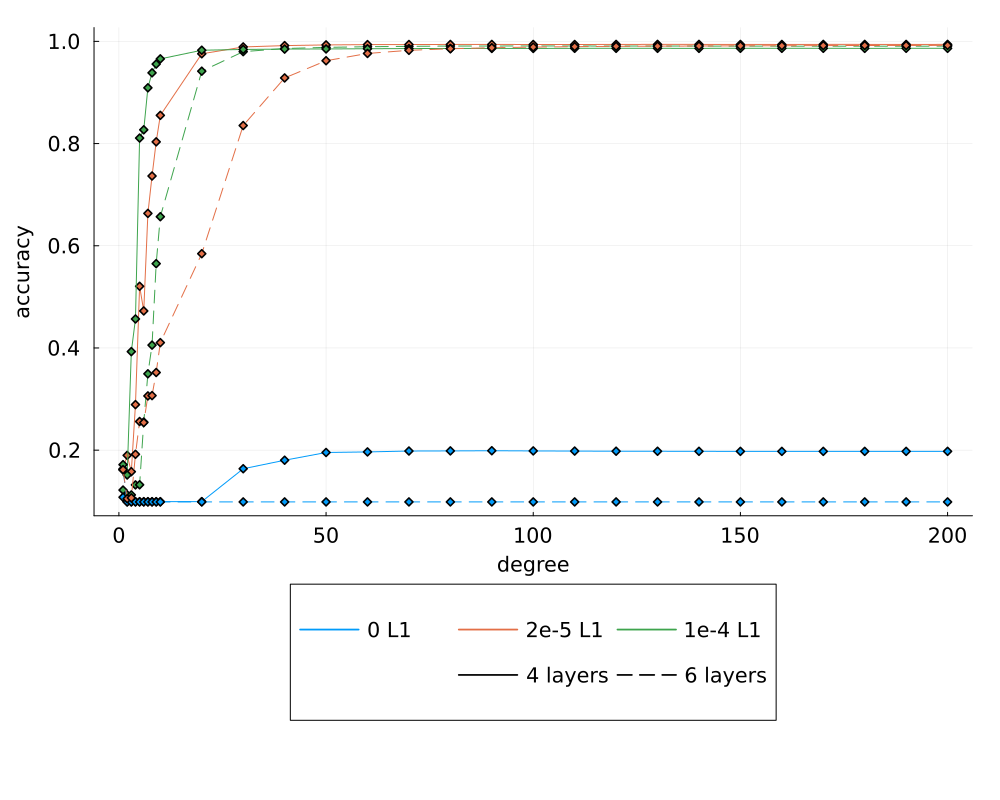

In [77]:
fontsize = 14
p = plot(xlabel="degree", ylabel="accuracy", legend=:outerbottom, 
        xguidefontsize=fontsize, yguidefontsize=fontsize, xtickfontsize=fontsize, ytickfontsize=fontsize, 
        legendfontsize=fontsize, size=(1000, 800), legend_column=3, margin=5mm)
for k in keys(results_mnist)
    degs = results_mnist[k]["degrees"]
    accs = results_mnist[k]["accs"]


    if contains(k, "x4")
        linestyle = :solid
    elseif contains(k, "x6")
        linestyle = :dash
    else
        @assert false "Unknown network $k"
    end

    if contains(k, "-net")
        color = 1
    elseif contains(k, "2e5")
        color = 2
    elseif contains(k, "1e4")
        color = 3
    else
        @assert false "Unknown network $k"
    end

    plot!(degs, accs, label=false, marker=:diamond, linestyle=linestyle, color=color)
end

plot!([0], [1], label="0 L1", color = 1)
plot!([0], [1], label="2e-5 L1", color = 2)
plot!([0], [1], label="1e-4 L1", color = 3)

plot!([0], [1], label="\n", color = :white)

plot!([0], [1], label="4 layers", color = :black, linestyle=:solid)
plot!([0], [1], label="6 layers", color = :black, linestyle=:dash)

In [78]:
savefig(p, "fig/accuracy_mnist2.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/accuracy_mnist2.pdf"

## Maximum Error

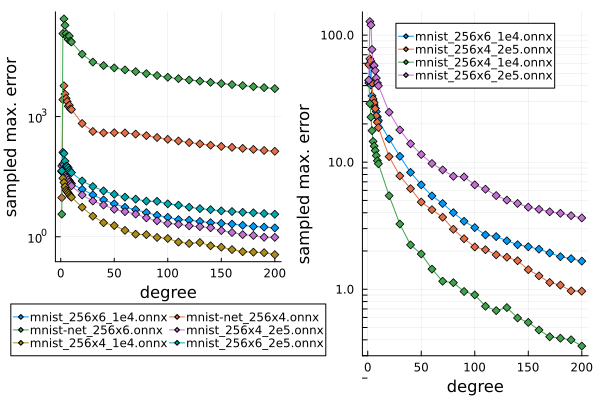

In [55]:
p1 = plot(xlabel="degree", ylabel="sampled max. error", yaxis=:log, legend=:outerbottom, legend_column=2)
for k in keys(results_mnist)
    degs = results_mnist[k]["degrees"]
    accs = results_mnist[k]["max_errs"]
    plot!(degs, accs, label=k, marker=:diamond)
end

ytick_positions = (0.1:0.1:0.9) ∪ (1:9) ∪ (10:10:100)
ytick_labels    = get_major_log_tick_labels(ytick_positions)
p2 = plot(xlabel="degree", ylabel="sampled max. error", yaxis=:log10, yticks=(ytick_positions, ytick_labels), legend=:top)
for k in keys(results_mnist)
    if (k == "mnist-net_256x4.onnx") || (k == "mnist-net_256x6.onnx")
        continue
    end

    degs = results_mnist[k]["degrees"]
    accs = results_mnist[k]["max_errs"]
    plot!(degs, accs, label=k, marker=:diamond)
end

plot(p1, p2)

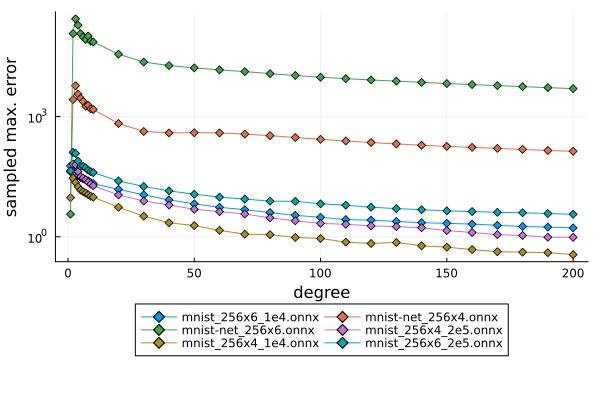

In [56]:
p1

In [57]:
savefig(p1, "fig/sampled_error_mnist.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/sampled_error_mnist.pdf"

## Runtime

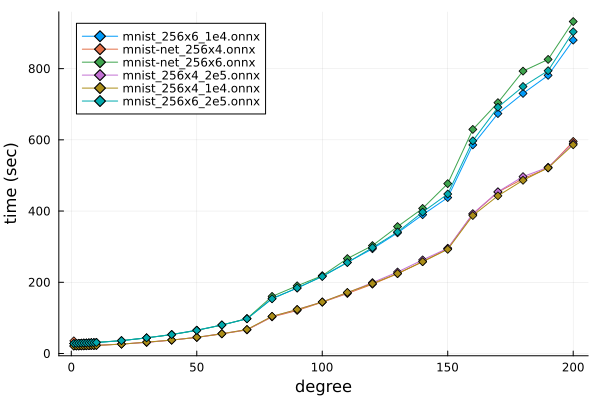

In [81]:
p = plot(xlabel="degree", ylabel="time (sec)", legend=:topleft)
for k in keys(results_mnist)
    degs = results_mnist[k]["degrees"]
    accs = results_mnist[k]["times"]
    plot!(degs, accs, label=k, marker=:diamond)
end

p

In [82]:
savefig(p, "fig/runtime_synthesis_mnist.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/runtime_synthesis_mnist.pdf"

# HELOC

In [87]:
logfiles_heloc = get_logfiles("../results/heloc", file_filter="2025-04-11T09:43")
netnames = logfile2netname.(logfiles_heloc)

results_heloc = Dict(netnames .=> load.(logfiles_heloc))

Dict{String, Dict{String, Any}} with 2 entries:
  "heloc.onnx"     => Dict("accs"=>Any[0.521943, 0.582178, 0.517353, 0.561144, …
  "heloc_2e5.onnx" => Dict("accs"=>Any[0.525672, 0.635147, 0.691079, 0.685152, …

In [88]:
results_heloc["heloc.onnx"]

Dict{String, Any} with 7 entries:
  "accs"     => Any[0.521943, 0.582178, 0.517353, 0.561144, 0.567071, 0.57625, …
  "nets"     => Any[Network(Layer[Dense{Float32, Adjoint{Float32, ReshapedArray…
  "degrees"  => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  110, 120, 130, 140, 150, 160…
  "mses"     => Any[36.1533, 1.25634, 2.6525, 1.42723, 1.28464, 1.11478, 0.8927…
  "max_errs" => Any[9.10426, 4.79529, 4.70309, 3.27428, 3.06231, 2.5797, 2.4095…
  "times"    => Any[0.271191, 0.0718509, 0.0860003, 0.0821619, 0.0981778, 0.102…
  "maes"     => Any[5.91202, 0.932053, 1.38583, 1.00015, 0.954151, 0.887569, 0.…

## Accuracy

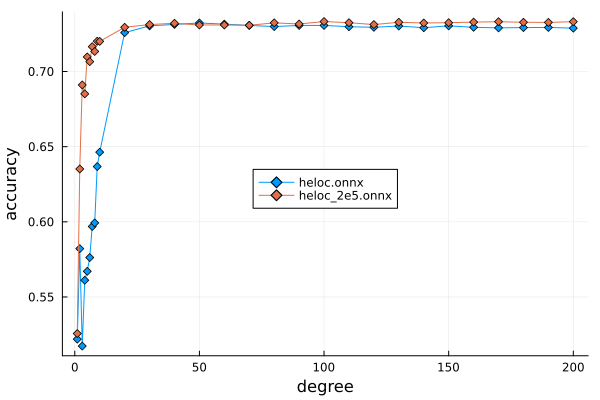

In [93]:
p = plot(xlabel="degree", ylabel="accuracy", legend=:inside)
for k in keys(results_heloc)
    degs = results_heloc[k]["degrees"]
    accs = results_heloc[k]["accs"]
    plot!(degs, accs, label=k, marker=:diamond)
end

p

In [94]:
savefig(p, "fig/accuracy_heloc.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/accuracy_heloc.pdf"

## Maximum Error

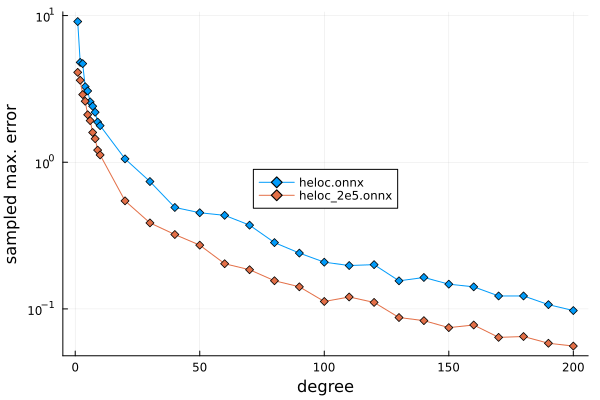

In [95]:
p = plot(xlabel="degree", ylabel="sampled max. error", legend=:inside, yscale=:log10)
for k in keys(results_heloc)
    degs = results_heloc[k]["degrees"]
    accs = results_heloc[k]["max_errs"]
    plot!(degs, accs, label=k, marker=:diamond)
end

p

In [96]:
savefig(p, "fig/sampled_error_heloc.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/sampled_error_heloc.pdf"

## Runtime

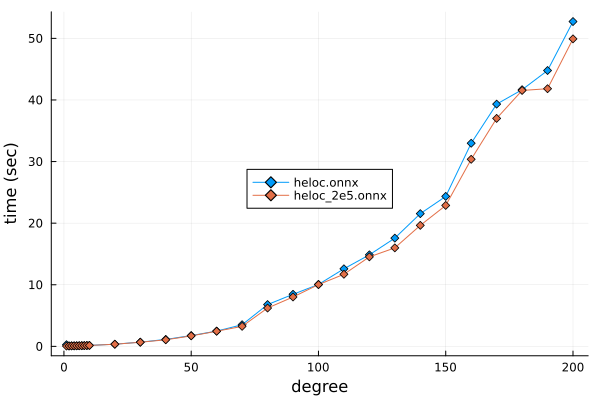

In [97]:
p = plot(xlabel="degree", ylabel="time (sec)", legend=:inside)
for k in keys(results_heloc)
    degs = results_heloc[k]["degrees"]
    accs = results_heloc[k]["times"]
    plot!(degs, accs, label=k, marker=:diamond)
end

p

In [98]:
savefig(p, "fig/runtime_synthesis_heloc.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/runtime_synthesis_heloc.pdf"